In [13]:
import numpy as np
from capsnet_keras import capsulenet
import os

In [15]:
n_routings = 3
n_epochs = 3
batch_size = 1000
lr = 0.001
lr_decay = 0.5
lam_recon = 0.392
shift_fraction = 0.1
save_dir = 'result'
test_dir = 'test'
manip_digit = 5

In [16]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [3]:
(x_train, y_train), (x_test, y_test) = capsulenet.load_mnist()

In [4]:
model, eval_model, manipulate_model = capsulenet.build_caps_net(
        input_shape=x_train.shape[1:],
        n_class=len(np.unique(np.argmax(y_train, 1))),
        n_routings=n_routings
    )
model.summary()

Instructions for updating:
dim is deprecated, use axis instead
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 20, 20, 256)  20992       input_1[0][0]                    
__________________________________________________________________________________________________
primarycap_conv2d (Conv2D)      (None, 6, 6, 256)    5308672     conv1[0][0]                      
__________________________________________________________________________________________________
primarycap_reshape (Reshape)    (None, 1152, 8)      0           primarycap_conv2d[0][0]          
______________________________________________

In [5]:
model.load_weights('weights.h5')

Epoch 1/3
60/60 [==============================] - 1153s 19s/step - loss: 0.0158 - capsnet_loss: 0.0067 - decoder_loss: 0.0230 - capsnet_acc: 0.9947 - val_loss: 0.0174 - val_capsnet_loss: 0.0060 - val_decoder_loss: 0.0290 - val_capsnet_acc: 0.9949

Epoch 00001: val_capsnet_acc improved from -inf to 0.99490, saving model to result/weights-01.h5
Epoch 2/3
60/60 [==============================] - 1162s 19s/step - loss: 0.0139 - capsnet_loss: 0.0052 - decoder_loss: 0.0223 - capsnet_acc: 0.9960 - val_loss: 0.0167 - val_capsnet_loss: 0.0057 - val_decoder_loss: 0.0282 - val_capsnet_acc: 0.9954

Epoch 00002: val_capsnet_acc improved from 0.99490 to 0.99540, saving model to result/weights-02.h5
Epoch 3/3
60/60 [==============================] - 1120s 19s/step - loss: 0.0133 - capsnet_loss: 0.0047 - decoder_loss: 0.0220 - capsnet_acc: 0.9963 - val_loss: 0.0158 - val_capsnet_loss: 0.0049 - val_decoder_loss: 0.0278 - val_capsnet_acc: 0.9955

Epoch 00003: val_capsnet_acc improved from 0.99540 to 0.

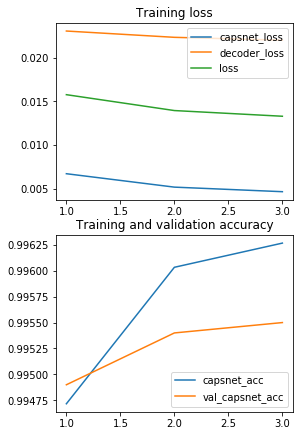

In [12]:
capsulenet.train(
    model=model,
    data=((x_train, y_train), (x_test, y_test)),
    save_dir=save_dir,
    batch_size=batch_size,
    epochs=n_epochs,
    lr=lr,
    lr_decay=lr_decay,
    lam_recon=lam_recon,
    shift_fraction=shift_fraction
)

------------------------------Begin: test------------------------------
Test acc: 1.0

Reconstructed images are saved to test/real_and_recon.png
------------------------------End: test------------------------------


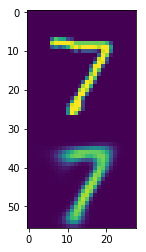

In [7]:
capsulenet.test(model=eval_model, data=(x_test[:1], y_test[:1]), save_dir='test')

------------------------------Begin: test------------------------------
Test acc: 0.9955

Reconstructed images are saved to test/real_and_recon.png
------------------------------End: test------------------------------


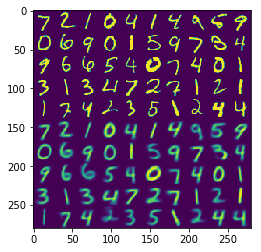

In [8]:
capsulenet.test(model=eval_model, data=(x_test, y_test), save_dir='test')

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
y_test.shape

(10000, 10)

In [13]:
y_test[18]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [12]:
capsulenet.manipulate_latent(manipulate_model, (x_test, y_test), manip_digit, 'test')

------------------------------Begin: manipulate------------------------------
manipulated result saved to test/manipulate-5.png
------------------------------End: manipulate------------------------------
